<a href="https://colab.research.google.com/github/lamiaakhairyibrahim/ITI_training/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means
K-means clustering is one of the widely used clustering algorithms due to its simplicity. In a single sentence, K-means clustering is all about choosing random centroids and assigning the close data points to the centroids.

# 1. Read the dataset
    
    
First, download the iris data set from K-Means, then use it without its labels.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#load and read the data
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print('The shape of the dataset is:', data.shape)

The shape of the dataset is: (150, 4)


In [4]:
# show the first 6 samples of data
X = pd.DataFrame(data , columns= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


# 2.Data investigation


in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows

**comment each issue you find**

In [5]:
# Let's see the data types and non-null values for each column
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
print(X.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [7]:
# This will print basic statistics for numerical columns
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3 .visualize any two features

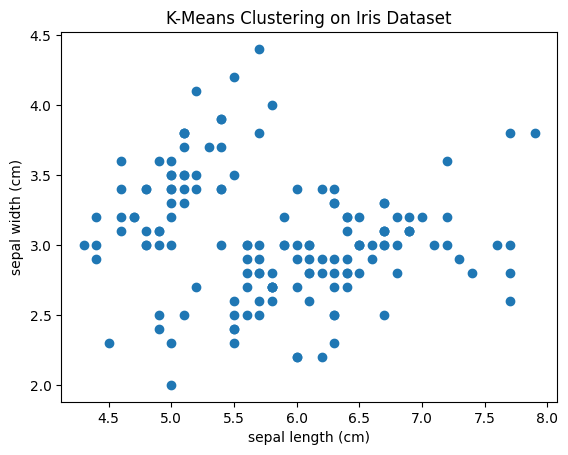

In [8]:
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], marker='o')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering on Iris Dataset")
plt.show()

## The dataset was loaded from sklearn, so we don't want to preprocess it; it's ready for use in the model

## 5. K Means



1- Use the k means from sklearn http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

2- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)

3- (Optionally) make a method that pick the best number of clusters for you

4- Using different techniques for scaling and comment on the result

In [9]:
from sklearn.cluster import KMeans

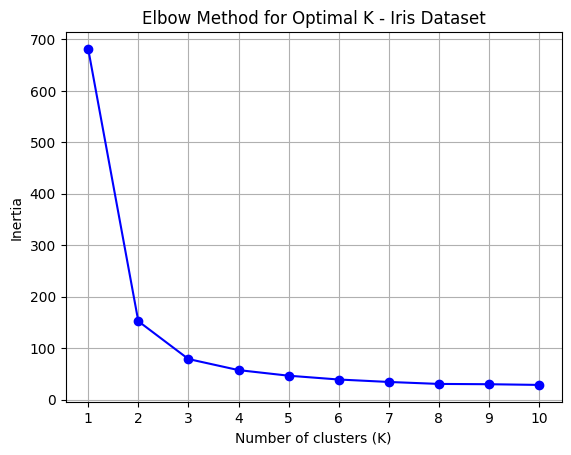

In [10]:
## Elbow Method

inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(K_range, inertia_values, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K - Iris Dataset')
plt.xticks(K_range)
plt.grid(True)
plt.show()

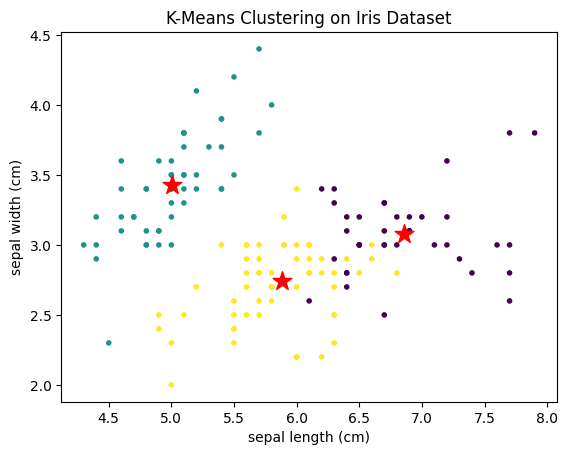

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=labels, marker='.')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering on Iris Dataset")
plt.show()


In [13]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris.data

distortions = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortion = np.sum(np.min(
        np.linalg.norm(X[:, np.newaxis] - kmeans.cluster_centers_, axis=2) ** 2, axis=1
    )) / X.shape[0]
    distortions[k] = distortion

for k, d in distortions.items():
    print(f"K={k}: Distortion={d:.4f}")



K=1: Distortion=4.5425
K=2: Distortion=1.0157
K=3: Distortion=0.5257
K=4: Distortion=0.3823
K=5: Distortion=0.3098
K=6: Distortion=0.2604
K=7: Distortion=0.2287
K=8: Distortion=0.2032
K=9: Distortion=0.1994
K=10: Distortion=0.1903


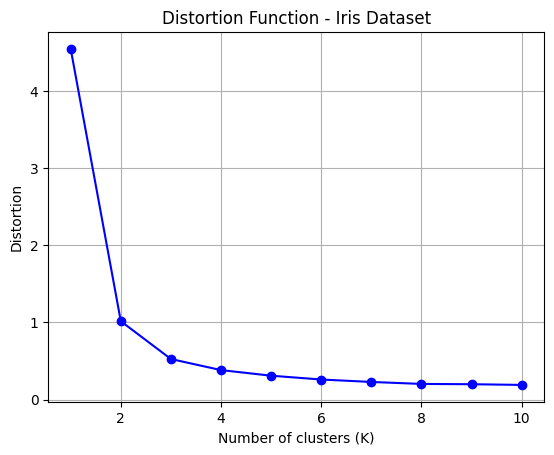

In [14]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt


iris = load_iris()
X = iris.data


distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortion = np.sum(np.min(
        np.linalg.norm(X[:, np.newaxis] - kmeans.cluster_centers_, axis=2) ** 2, axis=1
    )) / X.shape[0]
    distortions.append(distortion)


plt.plot(K_range, distortions, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.title('Distortion Function - Iris Dataset')
plt.grid(True)
plt.show()
